In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
iris.shape

(150, 5)

In [5]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [7]:
iris["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

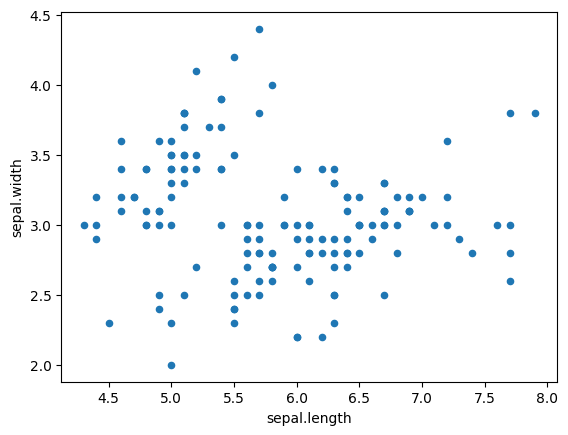

In [13]:
iris.plot(kind = "scatter", x = "sepal.length", y = "sepal.width")
plt.show()


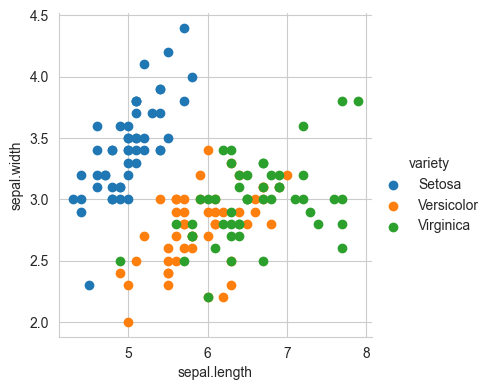

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue = "variety", height = 4) \
    .map(plt.scatter, "sepal.length", "sepal.width") \
    .add_legend();
plt.show()

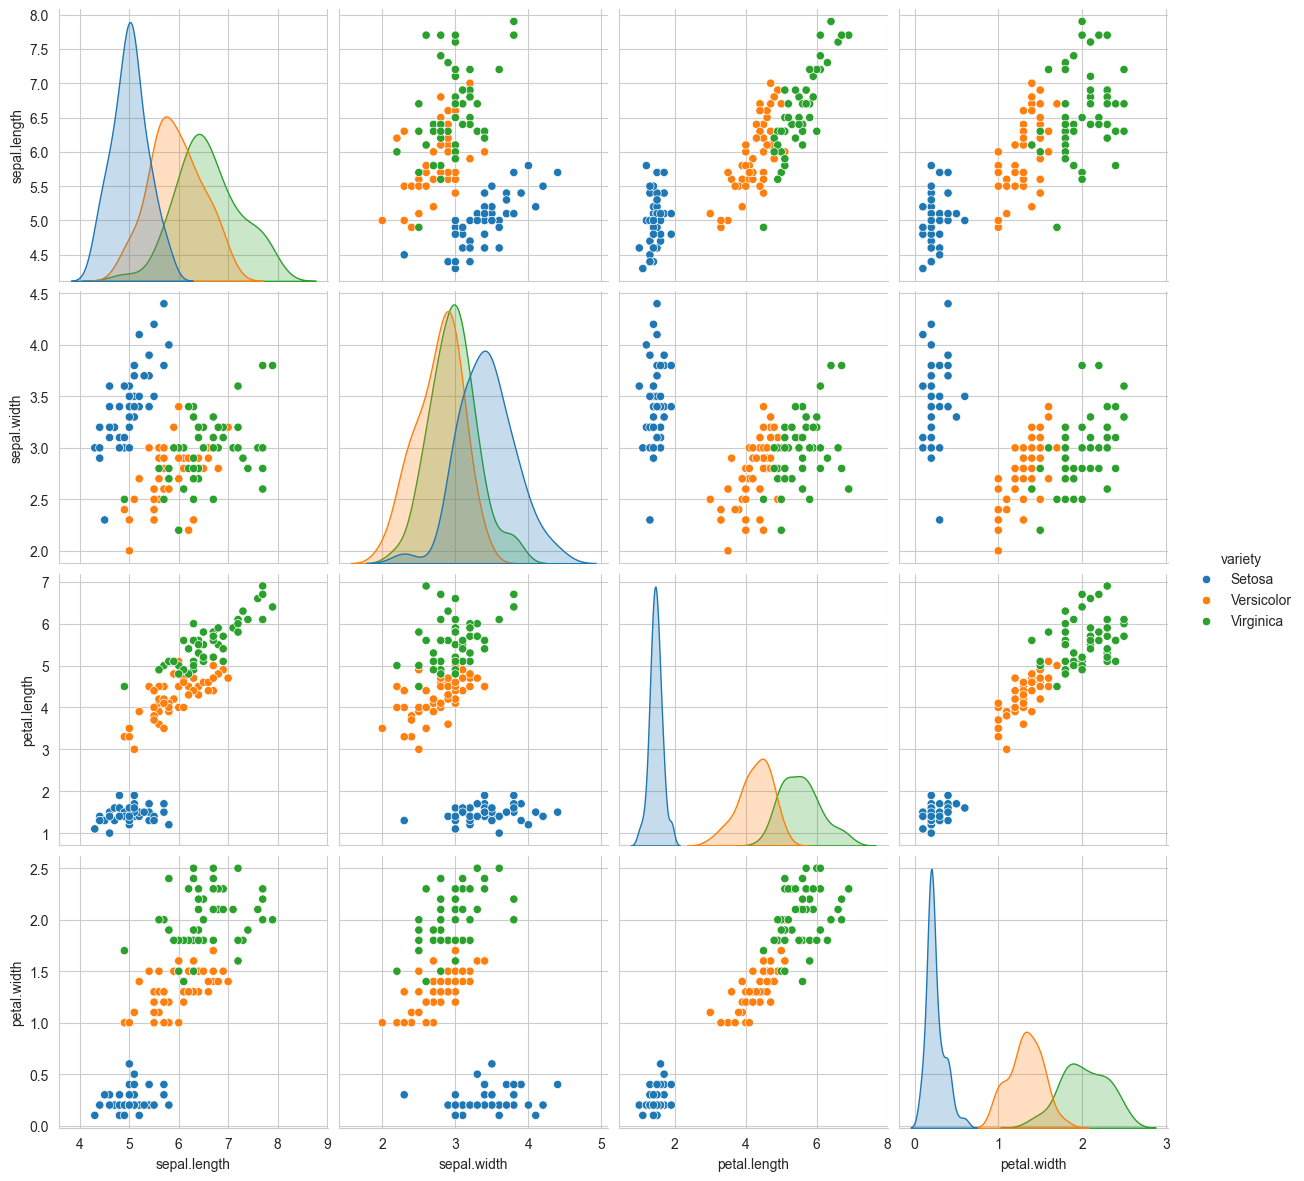

In [19]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue = "variety", height = 3);
plt.show()

In [24]:

summary_stats = iris.groupby('variety').agg(['mean', 'var', 'std'])
summary_stats


sepal.length                     sepal.width                      \
                   mean       var       std        mean       var       std   
variety                                                                       
Setosa            5.006  0.124249  0.352490       3.428  0.143690  0.379064   
Versicolor        5.936  0.266433  0.516171       2.770  0.098469  0.313798   
Virginica         6.588  0.404343  0.635880       2.974  0.104004  0.322497   

           petal.length                     petal.width                      
                   mean       var       std        mean       var       std  
variety                                                                      
Setosa            1.462  0.030159  0.173664       0.246  0.011106  0.105386  
Versicolor        4.260  0.220816  0.469911       1.326  0.039106  0.197753  
Virginica         5.552  0.304588  0.551895       2.026  0.075433  0.274650

In [30]:
# Median , Quantile , Percentile , IQR
summary_stats = iris.groupby('variety').agg(
    median=('sepal.length', 'median'),
    percentile=('sepal.length', lambda x: x.quantile(0.5)),
    quantile_25=('sepal.length', lambda x: x.quantile(0.25)),
    quantile_75=('sepal.length', lambda x: x.quantile(0.75)),
    iqr=('sepal.length', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    mad=('sepal.length', lambda x: (x - x.median()).abs().median())
).T


summary_stats


variety,Setosa,Versicolor,Virginica
median,5.0,5.90,6.500
percentile,5.0,5.90,6.500
quantile_25,4.8,5.60,6.225
quantile_75,5.2,6.30,6.900
iqr,0.4,0.70,0.675
mad,0.2,0.35,0.400


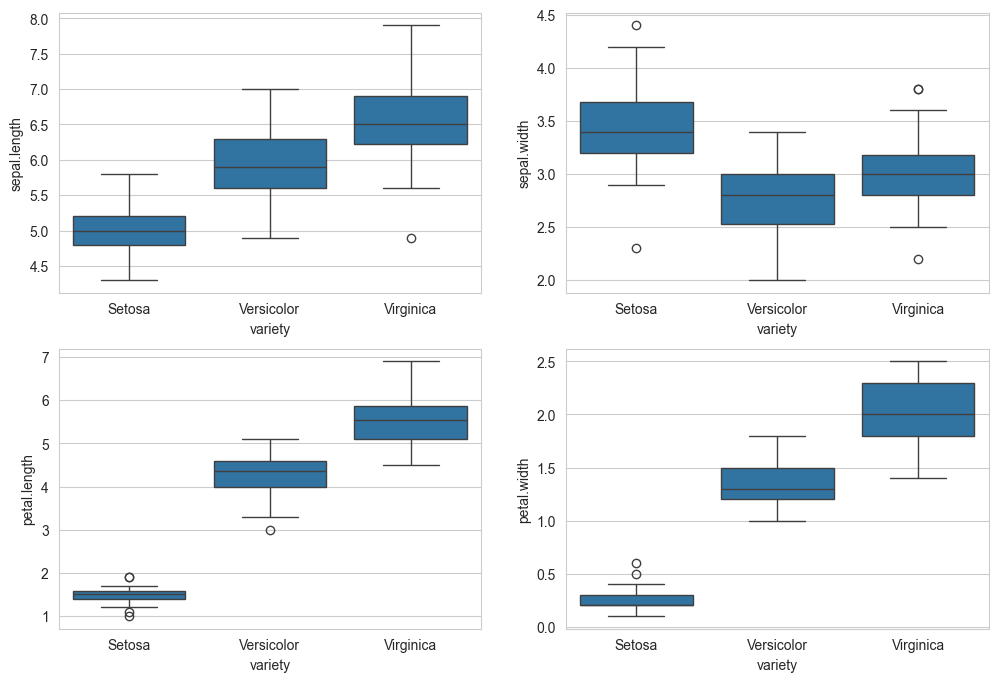

In [33]:

sns.set_style("whitegrid")

# Create a box plot for each feature with whiskers
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='variety', y=column, data=iris, whis=1.5)  # Adjust whis parameter for whisker length

plt.show()


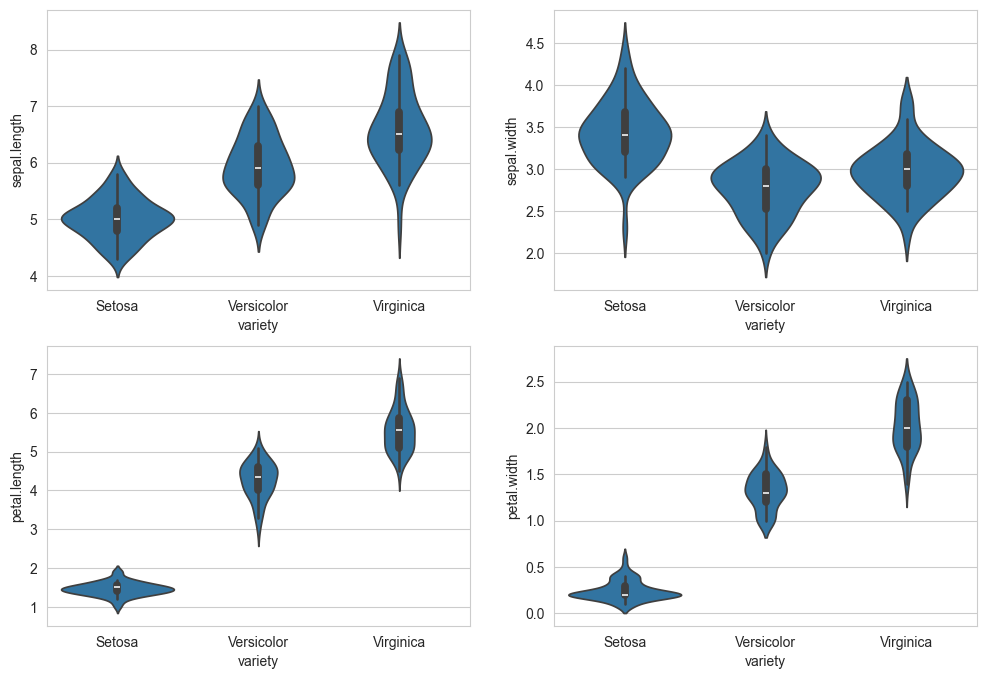

In [34]:

sns.set_style("whitegrid")

# Create a violin plot for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='variety', y=column, data=iris)

plt.show()


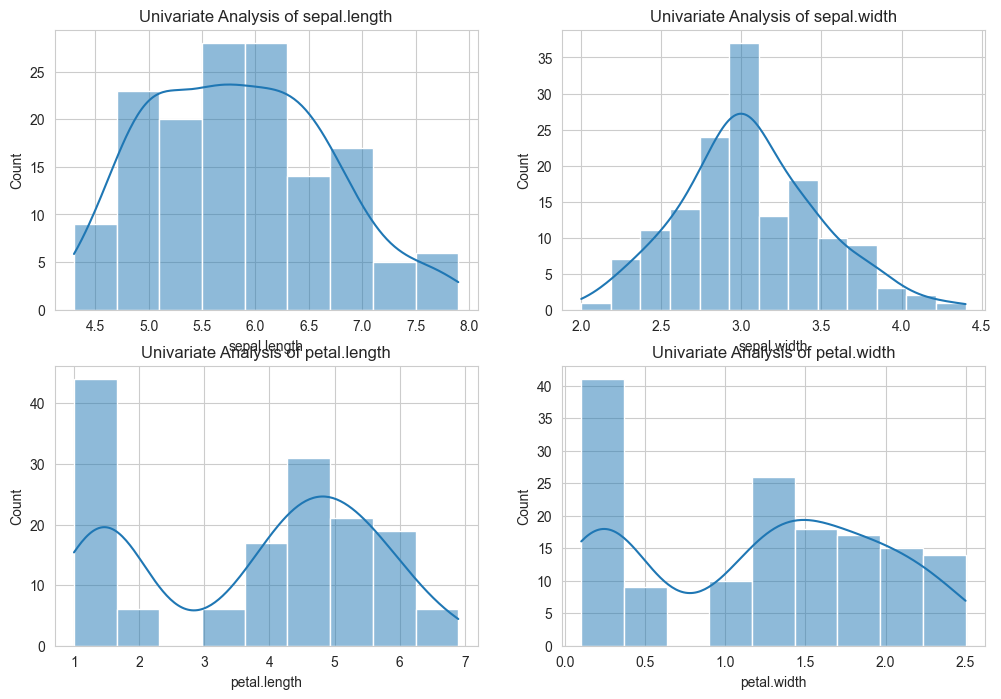

In [35]:


# Univariate analysis using histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris[column], kde=True)
    plt.title(f'Univariate Analysis of {column}')

plt.show()


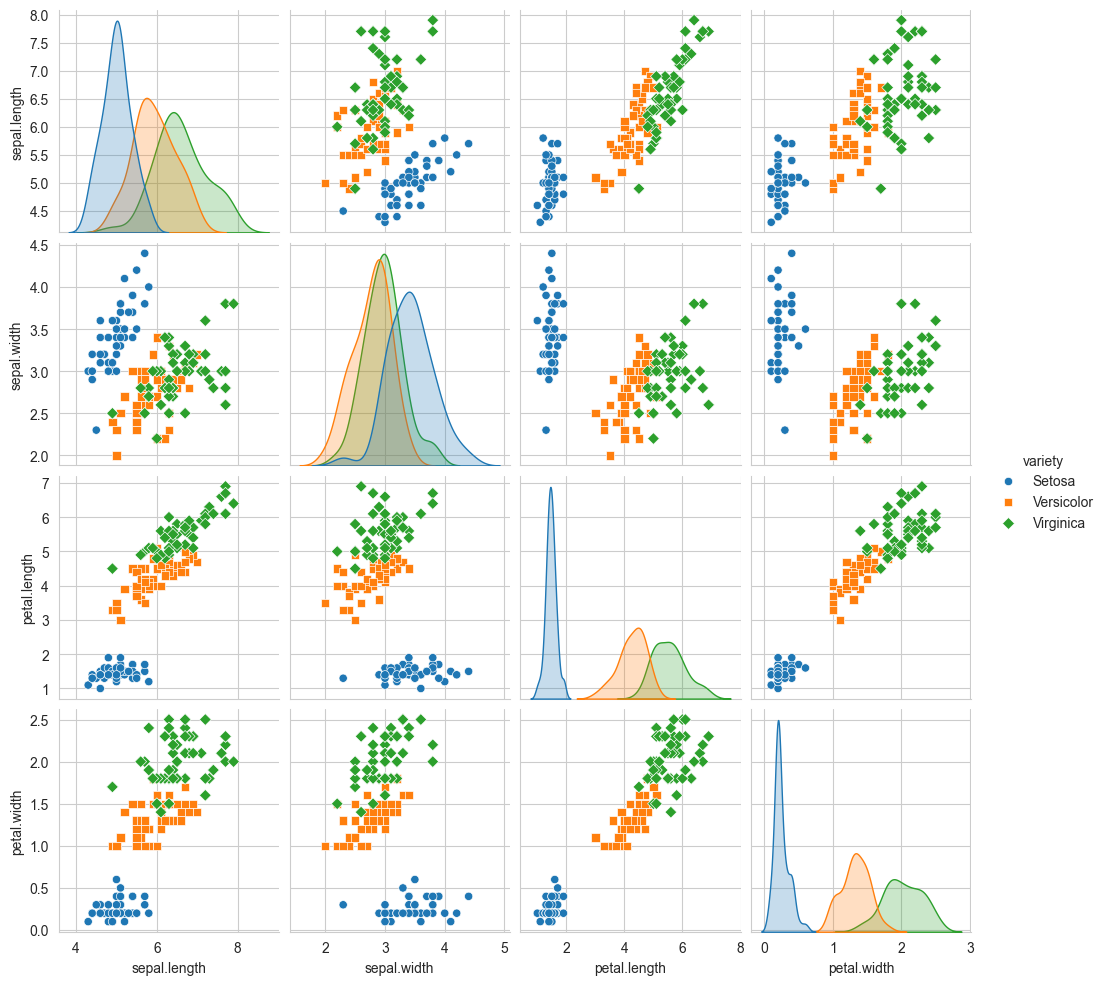

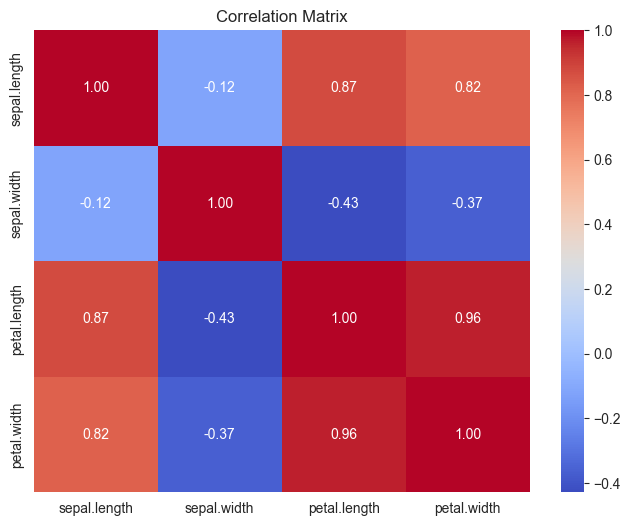

In [38]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a pair plot for bivariate analysis
sns.pairplot(iris, hue='variety', markers=["o", "s", "D"])
plt.show()

# Correlation matrix for numeric columns
numeric_columns = iris.select_dtypes(include=['float64']).columns
correlation_matrix = iris[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


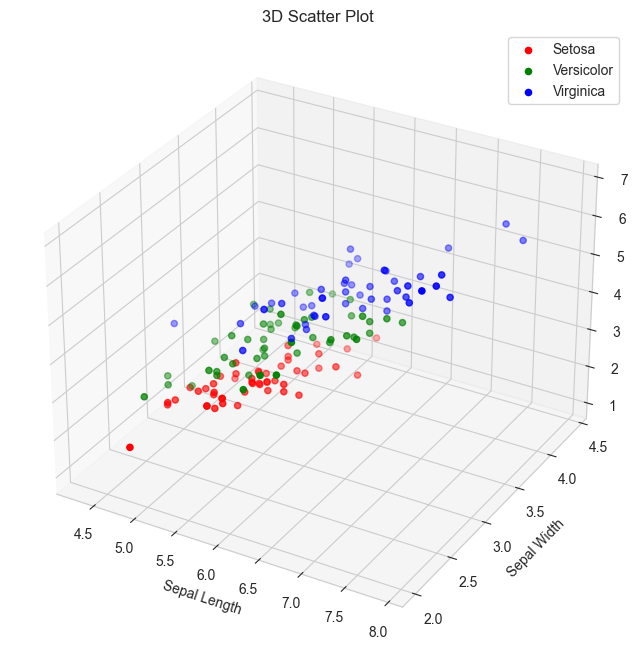

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Multivariate analysis using 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for variety, color in zip(iris['variety'].unique(), ['r', 'g', 'b']):
    subset = iris[iris['variety'] == variety]
    ax.scatter(subset['sepal.length'], subset['sepal.width'], subset['petal.length'], c=color, label=variety)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot')
ax.legend()
plt.show()


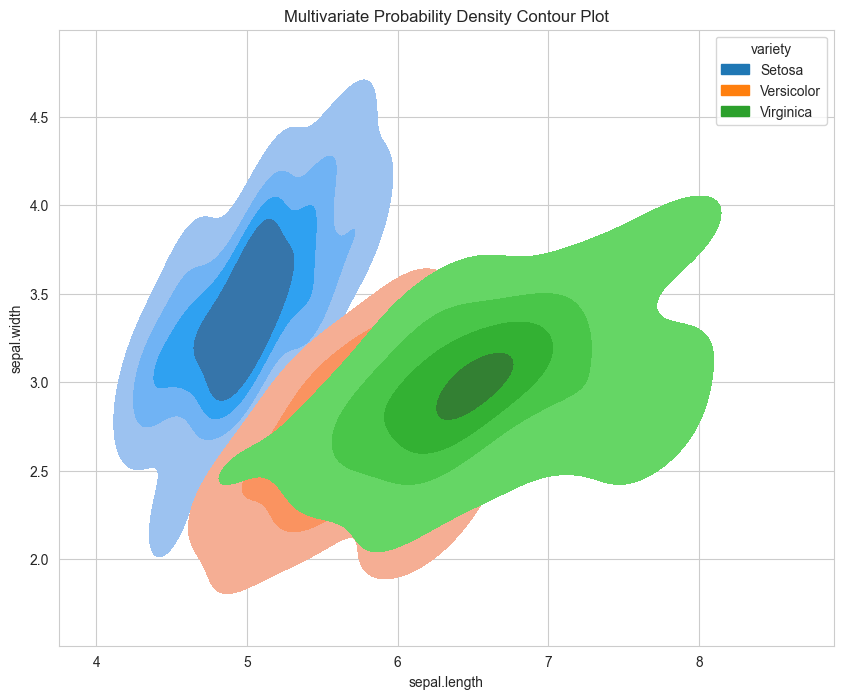

In [45]:

# Create a multivariate probability density contour plot
plt.figure(figsize=(10, 8))
sns.kdeplot(data=iris, x='sepal.length', y='sepal.width', hue='variety', fill=True, levels=5)
plt.title('Multivariate Probability Density Contour Plot')
plt.show()
